In [ ]:
# -------------------------------------------------- #
# Author: Jiayu Yang
# Date: 15 May 2023
# File Name: [Project CD] 2D FDM with Central, Artificial, Upwind Difference Scheme
# File Description: 
#    This file aims at solving the 2D steady convection-diffusion problems using the
#    Finite Difference Method (FDM) with respectively:
#        - Central Difference Scheme
#        - Artificial Difference Scheme
#        - Upwind Difference Scheme
#    The comparison of stability is also included.
# Web Link to Github: https://github.com/LakeYang0818/Solving-Convection-Diffusion-Problems
# -------------------------------------------------- #

In [1]:
import numpy as np
import math as m
import mpmath
import matplotlib.pyplot as plt
import sys
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

colorinterpolation = 50
colourMap = plt.cm.jet

In [2]:
def FDM_2D_Central(a, mu, s, u0, uN, N, M):
    dx = 1 / N
    dy = 1 / M
    A = np.zeros(((M - 1) * (N - 1), (M - 1) * (N - 1)))
    S = np.ones(((M - 1) * (N - 1))) * s

    X_left  = - a / (2 * dx) - mu / (dx ** 2)
    X_right = + a / (2 * dx) - mu / (dx ** 2)
    XY_mid  = 2 * mu * ((1 / (dx ** 2)) + (1 / (dy ** 2)))
    Y_left  = - a / (2 * dy) - mu / (dy ** 2)
    Y_right = + a / (2 * dy) - mu / (dy ** 2)
    
    A_right = np.zeros((N - 1, N - 1))
    A_left  = np.zeros((N - 1, N - 1))

    for i in range(N - 1):
        A_right[i, i] = X_right
        A_left[i,  i] = X_left

    for i in range(N - 1):
        num_min = i * (N - 1)
        num_max = (i + 1) * (N - 1)
        if i == 0:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
        elif i == N - 2:
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left
        else:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left

    for i in range(N - 1):
        num_min = i * (N - 1)
        num_max = (i + 1) * (N - 1)

        # Left and Right Matrices
        if i == 0:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
        elif i == N - 2:
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left
        else:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left

        # Diagonal Matrices
        A_diag = np.zeros((M - 1, M - 1))        
        for j in range(M - 1):
            if j == 0:
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j + 1] = Y_right

            elif j == M - 2:
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j - 1] = Y_left
            else:
                A_diag[j, j - 1] = Y_left
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j + 1] = Y_right

        A[num_min : num_max, num_min : num_max] = A_diag
        
    FDM_2D_Central = np.zeros((N + 1, M + 1))
    FDM_2D_Central[1 : N, 1 : M] = np.linalg.solve(A, S).reshape((N - 1, M - 1))
    return FDM_2D_Central

def FDM_2D_Artificial(a, mu, s, u0, uN, N, M):
    Pe = a / (2 * mu * N)
    beta = mpmath.coth(Pe) - 1 / Pe
    mu_sub = beta * mu * Pe
    dx = 1 / N
    dy = 1 / M
    A = np.zeros(((M - 1) * (N - 1), (M - 1) * (N - 1)))
    S = np.ones(((M - 1) * (N - 1))) * s

    X_left  = - a / (2 * dx) - (mu + mu_sub) / (dx ** 2)
    X_right = + a / (2 * dx) - (mu + mu_sub) / (dx ** 2)
    Y_left  = - a / (2 * dy) - (mu + mu_sub) / (dy ** 2)
    Y_right = + a / (2 * dy) - (mu + mu_sub) / (dy ** 2)
    XY_mid  = - (X_left + X_right + Y_left + Y_right)
    
    A_right = np.zeros((N - 1, N - 1))
    A_left  = np.zeros((N - 1, N - 1))

    for i in range(N - 1):
        A_right[i, i] = X_right
        A_left[i,  i] = X_left

    for i in range(N - 1):
        num_min = i * (N - 1)
        num_max = (i + 1) * (N - 1)
        if i == 0:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
        elif i == N - 2:
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left
        else:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left

    for i in range(N - 1):
        num_min = i * (N - 1)
        num_max = (i + 1) * (N - 1)

        # Left and Right Matrices
        if i == 0:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
        elif i == N - 2:
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left
        else:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left

        # Diagonal Matrices
        A_diag = np.zeros((M - 1, M - 1))        
        for j in range(M - 1):
            if j == 0:
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j + 1] = Y_right

            elif j == M - 2:
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j - 1] = Y_left
            else:
                A_diag[j, j - 1] = Y_left
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j + 1] = Y_right

        A[num_min : num_max, num_min : num_max] = A_diag
        
    FDM_2D_Artificial = np.zeros((N + 1, M + 1))
    FDM_2D_Artificial[1 : N, 1 : M] = np.linalg.solve(A, S).reshape((N - 1, M - 1))
    return FDM_2D_Artificial


def FDM_2D_Upwinding(a, mu, s, u0, uN, N, M):
    dx = 1 / N
    dy = 1 / M
    Pe = a * dx / (2 * mu)
    beta = mpmath.coth(Pe) - 1 / Pe

    A = np.zeros(((M - 1) * (N - 1), (M - 1) * (N - 1)))
    S = np.ones(((M - 1) * (N - 1))) * s

    X_left  = - (1 + beta) * a / (2 * dx) - mu / (dx ** 2)
    X_right = + (1 + beta) * a / (2 * dx) - mu / (dx ** 2)
    Y_left  = - (1 + beta) * a / (2 * dy) - mu / (dy ** 2)
    Y_right = + (1 + beta) * a / (2 * dy) - mu / (dy ** 2)
    XY_mid  = - (X_left + X_right + Y_left + Y_right)
    
    A_right = np.zeros((N - 1, N - 1))
    A_left  = np.zeros((N - 1, N - 1))

    for i in range(N - 1):
        A_right[i, i] = X_right
        A_left[i,  i] = X_left

    for i in range(N - 1):
        num_min = i * (N - 1)
        num_max = (i + 1) * (N - 1)
        if i == 0:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
        elif i == N - 2:
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left
        else:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left

    for i in range(N - 1):
        num_min = i * (N - 1)
        num_max = (i + 1) * (N - 1)

        # Left and Right Matrices
        if i == 0:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
        elif i == N - 2:
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left
        else:
            A[num_min : num_max, num_min + (N - 1) : num_max + (N - 1)] = A_right
            A[num_min : num_max, num_min - (N - 1) : num_max - (N - 1)] = A_left

        # Diagonal Matrices
        A_diag = np.zeros((M - 1, M - 1))        
        for j in range(M - 1):
            if j == 0:
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j + 1] = Y_right

            elif j == M - 2:
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j - 1] = Y_left
            else:
                A_diag[j, j - 1] = Y_left
                A_diag[j,   j  ] = XY_mid
                A_diag[j, j + 1] = Y_right

        A[num_min : num_max, num_min : num_max] = A_diag
        
    FDM_2D_Upwinding = np.zeros((N + 1, M + 1))
    FDM_2D_Upwinding[1 : N, 1 : M] = np.linalg.solve(A, S).reshape((N - 1, M - 1))
    return FDM_2D_Upwinding


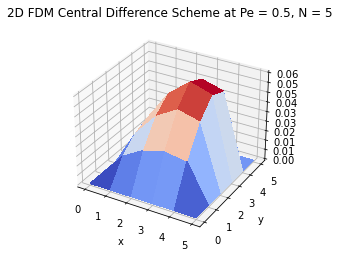

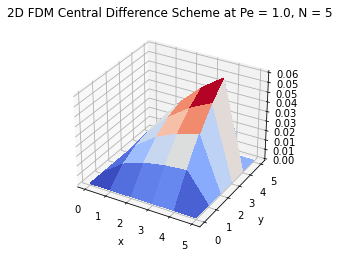

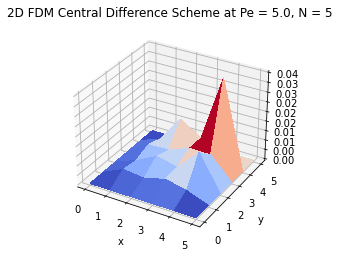

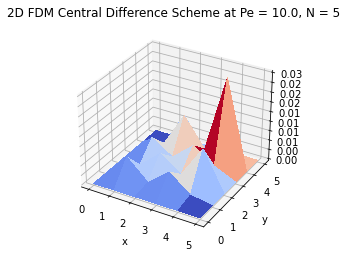

In [3]:
def Simple_Plot_3D_comparison(a, mu, s, u0, uN, N, M):
    Pe = a / (2 * N * mu)
    
    # Calculation
    FDM_cen = FDM_2D_Central(a, mu, s, u0, uN, N, M)    
    FDM_cen_data = FDM_cen.reshape((N + 1, M + 1))

    fig = plt.figure(figsize = (5, 4))
    ax = plt.axes(projection='3d')
    plt.rcParams['legend.fontsize'] = 10
    
    x = range(N + 1)
    y = range(M + 1)
    X, Y = np.meshgrid(x, y)
    
    ax.plot_surface(X, Y, FDM_cen_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('2D FDM Central Difference Scheme at Pe = %s, N = %s'%(Pe, N))
    #plt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D FDM Central Difference Scheme at Pe = %s, N = %s.png'%(Pe, N))
    plt.show()
    
    
N = 5
M = 5
s = 1
mu = 1
u0 = 0
uN = 0
Pe_choice = [0.5, 1, 5, 10]
for Pe in Pe_choice:
    a = Pe * 2 * N * mu
    Simple_Plot_3D_comparison(a, mu, s, u0, uN, N, M)

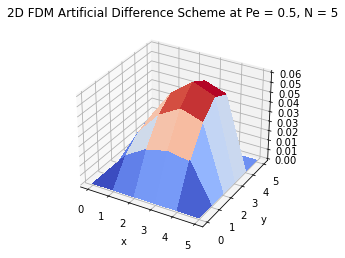

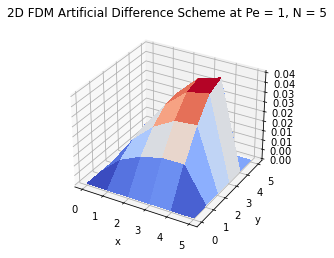

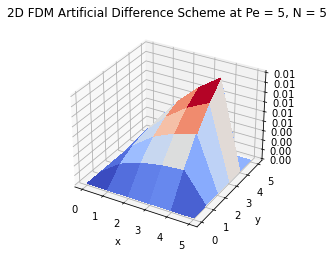

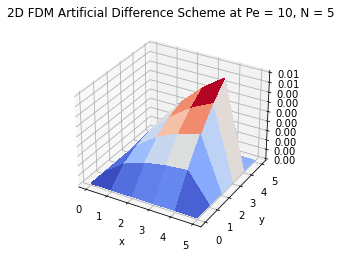

In [4]:
def Simple_Plot_3D_comparison_Artificial(a, mu, s, u0, uN, N, M):
    
    # Calculation
    FDM_art = FDM_2D_Artificial(a, mu, s, u0, uN, N, M)    
    FDM_art_data = FDM_art.reshape((N + 1, M + 1))

    fig = plt.figure(figsize = (5, 4))
    ax = plt.axes(projection='3d')
    plt.rcParams['legend.fontsize'] = 10
    
    x = range(N + 1)
    y = range(M + 1)
    X, Y = np.meshgrid(x, y)
    
    ax.plot_surface(X, Y, FDM_art_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('2D FDM Artificial Difference Scheme at Pe = %s, N = %s'%(Pe, N))
    #plt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D FDM Artificial Difference Scheme at Pe = %s, N = %s.png'%(Pe, N))
    plt.show()
    
    
N = 5
M = 5
s = 1
mu = 1
u0 = 0
uN = 0
Pe_choice = [0.5, 1, 5, 10]
for Pe in Pe_choice:
    a = Pe * 2 * N * mu
    Simple_Plot_3D_comparison_Artificial(a, mu, s, u0, uN, N, M)
    

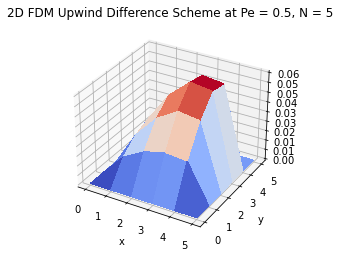

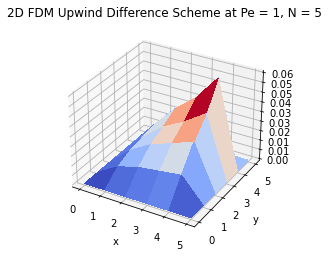

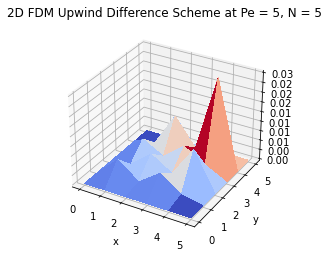

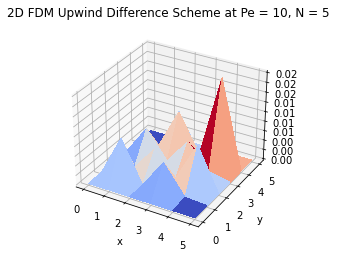

In [5]:
def Simple_Plot_3D_comparison_Upwind(a, mu, s, u0, uN, N, M):
    
    # Calculation
    FDM_upw = FDM_2D_Upwinding(a, mu, s, u0, uN, N, M)  
    FDM_upw_data = FDM_upw.reshape((N + 1, M + 1))

    fig = plt.figure(figsize = (5, 4))
    ax = plt.axes(projection='3d')
    plt.rcParams['legend.fontsize'] = 10
    
    x = range(N + 1)
    y = range(M + 1)
    X, Y = np.meshgrid(x, y)
    
    ax.plot_surface(X, Y, FDM_upw_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('2D FDM Upwind Difference Scheme at Pe = %s, N = %s'%(Pe, N))
    #plt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D FDM Upwind Difference Scheme at Pe = %s, N = %s.png'%(Pe, N))
    plt.show()
    
    
N = 5
M = 5
s = 1
mu = 1
u0 = 0
uN = 0
Pe_choice = [0.5, 1, 5, 10]
for Pe in Pe_choice:
    a = Pe * 2 * N * mu
    Simple_Plot_3D_comparison_Upwind(a, mu, s, u0, uN, N, M)
    

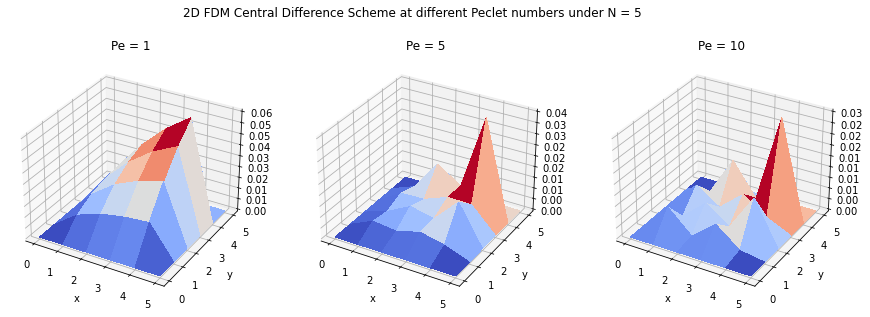

In [6]:
N = 5
M = 5
s = 1
mu = 1
u0 = 0
uN = 0
x = range(N + 1)
y = range(M + 1)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15, 5))
fig.suptitle('2D FDM Central Difference Scheme at different Peclet numbers under N = %s'%N)
Pe = 1
a = Pe * 2 * N * mu
FDM_cen = FDM_2D_Central(a, mu, s, u0, uN, N, M)    
FDM_cen_data = FDM_cen.reshape((N + 1, M + 1))
axs[0].plot_surface(X, Y, FDM_cen_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[0].zaxis.set_major_locator(LinearLocator(10))
axs[0].zaxis.set_major_formatter('{x:.02f}')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Pe = %s'%Pe)

Pe = 5
a = Pe * 2 * N * mu
FDM_cen = FDM_2D_Central(a, mu, s, u0, uN, N, M)    
FDM_cen_data = FDM_cen.reshape((N + 1, M + 1))
axs[1].plot_surface(X, Y, FDM_cen_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[1].zaxis.set_major_locator(LinearLocator(10))
axs[1].zaxis.set_major_formatter('{x:.02f}')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Pe = %s'%Pe)

Pe = 10
a = Pe * 2 * N * mu
FDM_cen = FDM_2D_Central(a, mu, s, u0, uN, N, M)    
FDM_cen_data = FDM_cen.reshape((N + 1, M + 1))
axs[2].plot_surface(X, Y, FDM_cen_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[2].zaxis.set_major_locator(LinearLocator(10))
axs[2].zaxis.set_major_formatter('{x:.02f}')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Pe = %s'%Pe)

#plt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D FDM Central Difference Scheme at different Peclet numbers.png')
plt.show()




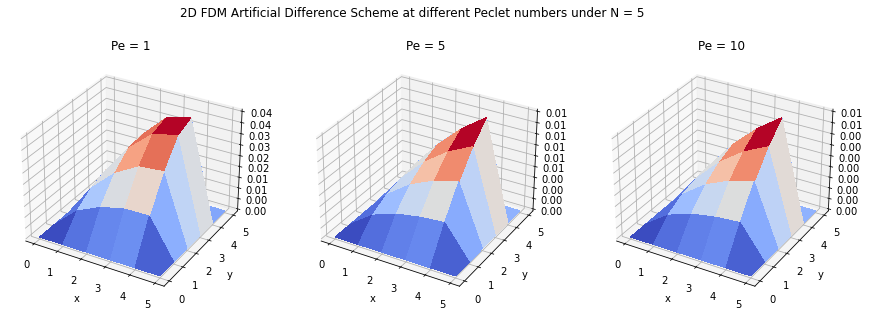

In [7]:
N = 5
M = 5
s = 1
mu = 1
u0 = 0
uN = 0
x = range(N + 1)
y = range(M + 1)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15, 5))
fig.suptitle('2D FDM Artificial Difference Scheme at different Peclet numbers under N = %s'%N)
Pe = 1
a = Pe * 2 * N * mu
FDM_art = FDM_2D_Artificial(a, mu, s, u0, uN, N, M)    
FDM_art_data = FDM_art.reshape((N + 1, M + 1))
axs[0].plot_surface(X, Y, FDM_art_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[0].zaxis.set_major_locator(LinearLocator(10))
axs[0].zaxis.set_major_formatter('{x:.02f}')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Pe = %s'%Pe)

Pe = 5
a = Pe * 2 * N * mu
FDM_art = FDM_2D_Artificial(a, mu, s, u0, uN, N, M)    
FDM_art_data = FDM_art.reshape((N + 1, M + 1))
axs[1].plot_surface(X, Y, FDM_art_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[1].zaxis.set_major_locator(LinearLocator(10))
axs[1].zaxis.set_major_formatter('{x:.02f}')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Pe = %s'%Pe)

Pe = 10
a = Pe * 2 * N * mu
FDM_art = FDM_2D_Artificial(a, mu, s, u0, uN, N, M)    
FDM_art_data = FDM_art.reshape((N + 1, M + 1))
axs[2].plot_surface(X, Y, FDM_art_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[2].zaxis.set_major_locator(LinearLocator(10))
axs[2].zaxis.set_major_formatter('{x:.02f}')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Pe = %s'%Pe)

#dplt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D FDM Artificial Difference Scheme at different Peclet numbers.png')
plt.show()




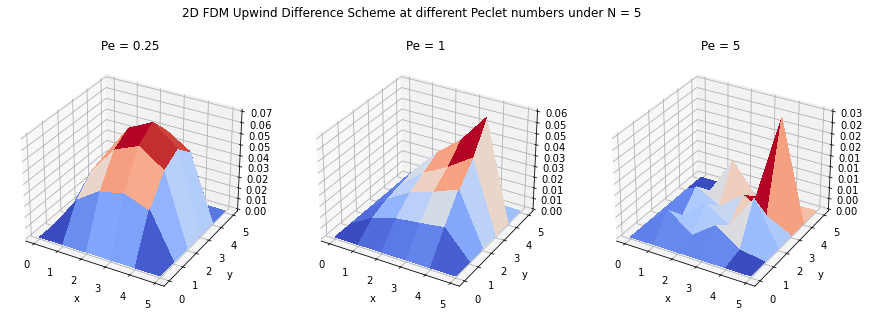

In [14]:
N = 5
M = 5
s = 1
mu = 1
u0 = 0
uN = 0
x = range(N + 1)
y = range(M + 1)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15, 5))
fig.suptitle('2D FDM Upwind Difference Scheme at different Peclet numbers under N = %s'%N)
Pe = 0.25
a = Pe * 2 * N * mu
FDM_upw = FDM_2D_Upwinding(a, mu, s, u0, uN, N, M)    
FDM_upw_data = FDM_upw.reshape((N + 1, M + 1))
axs[0].plot_surface(X, Y, FDM_upw_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[0].zaxis.set_major_locator(LinearLocator(10))
axs[0].zaxis.set_major_formatter('{x:.02f}')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Pe = %s'%Pe)

Pe = 1
a = Pe * 2 * N * mu
FDM_upw = FDM_2D_Upwinding(a, mu, s, u0, uN, N, M)    
FDM_upw_data = FDM_upw.reshape((N + 1, M + 1))
axs[1].plot_surface(X, Y, FDM_upw_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[1].zaxis.set_major_locator(LinearLocator(10))
axs[1].zaxis.set_major_formatter('{x:.02f}')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Pe = %s'%Pe)

Pe = 5
a = Pe * 2 * N * mu
FDM_upw = FDM_2D_Upwinding(a, mu, s, u0, uN, N, M)    
FDM_upw_data = FDM_upw.reshape((N + 1, M + 1))
axs[2].plot_surface(X, Y, FDM_upw_data, cmap = cm.coolwarm,linewidth = 0, antialiased = False)
axs[2].zaxis.set_major_locator(LinearLocator(10))
axs[2].zaxis.set_major_formatter('{x:.02f}')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Pe = %s'%Pe)

#plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D FDM Upwind Difference Scheme at different Peclet numbers.png')
plt.show()




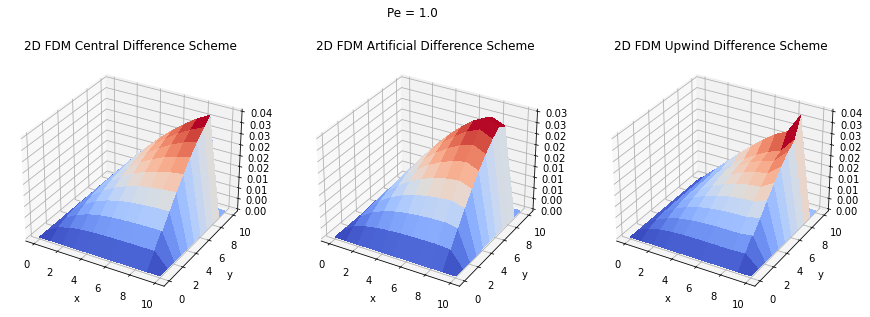

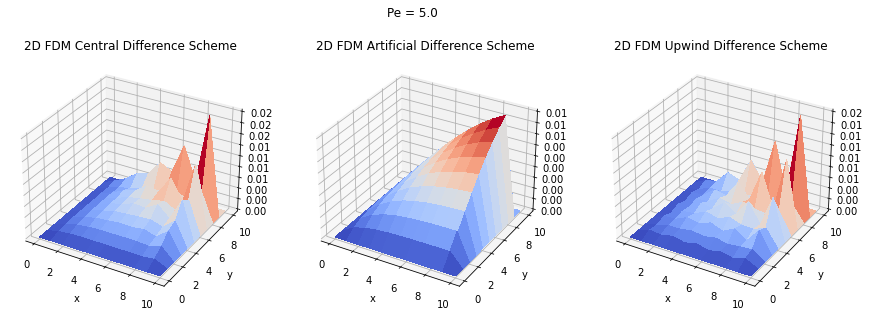

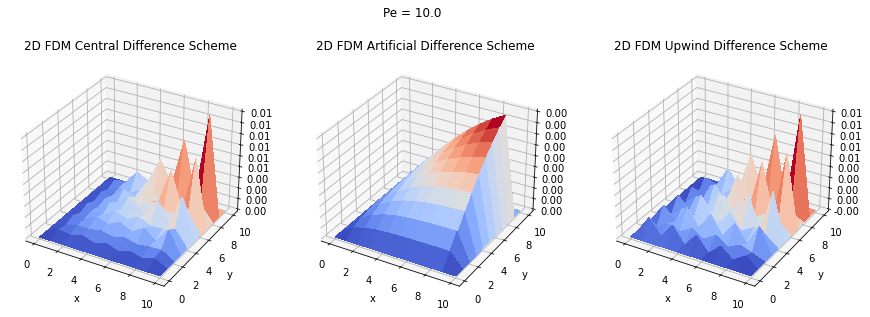

In [13]:
def Plot_3D_comparison(a, mu, s, u0, uN, N, M):
    Pe = a / (2 * N * mu)
    
    # Calculation
    FDM_cen = FDM_2D_Central(a, mu, s, u0, uN, N, M)
    FDM_art = FDM_2D_Artificial(a, mu, s, u0, uN, N, M)
    FDM_upw = FDM_2D_Upwinding(a, mu, s, u0, uN, N, M)
    
    FDM_cen_data = FDM_cen.reshape((N + 1, M + 1))
    FDM_art_data = FDM_art.reshape((N + 1, M + 1))
    FDM_upw_data = FDM_upw.reshape((N + 1, M + 1))
    
    # Plot 
    fig, axs = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15, 5))
    fig.suptitle('Pe = %s'%Pe)
    x = range(N + 1)
    y = range(M + 1)
    X, Y = np.meshgrid(x, y)
    
    C1 = axs[0].plot_surface(X, Y, FDM_cen_data, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)
    
    C2 = axs[1].plot_surface(X, Y, FDM_art_data, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)
    
    C3 = axs[2].plot_surface(X, Y, FDM_upw_data, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)
    
    axs[0].zaxis.set_major_locator(LinearLocator(10))
    axs[0].zaxis.set_major_formatter('{x:.02f}')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    
    axs[1].zaxis.set_major_locator(LinearLocator(10))
    axs[1].zaxis.set_major_formatter('{x:.02f}')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    
    axs[2].zaxis.set_major_locator(LinearLocator(10))
    axs[2].zaxis.set_major_formatter('{x:.02f}')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    
    axs[0].set_title('2D FDM Central Difference Scheme')
    axs[1].set_title('2D FDM Artificial Difference Scheme')
    axs[2].set_title('2D FDM Upwind Difference Scheme')
    
    #plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/2D Comparison of FDM with different schemes at Pe = %s.png'%Pe)
    plt.show()
    
N = 10
M = 10
s = 1
mu = 1
u0 = 0
uN = 0
Pe_choice = [1, 5, 10]
for Pe in Pe_choice:
    a = Pe * 2 * N * mu
    Plot_3D_comparison(a, mu, s, u0, uN, N, M)

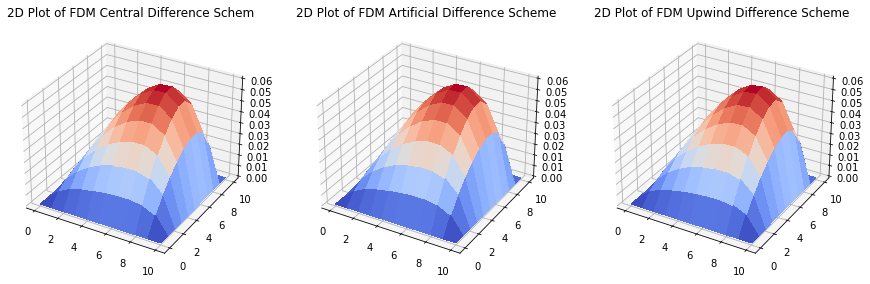

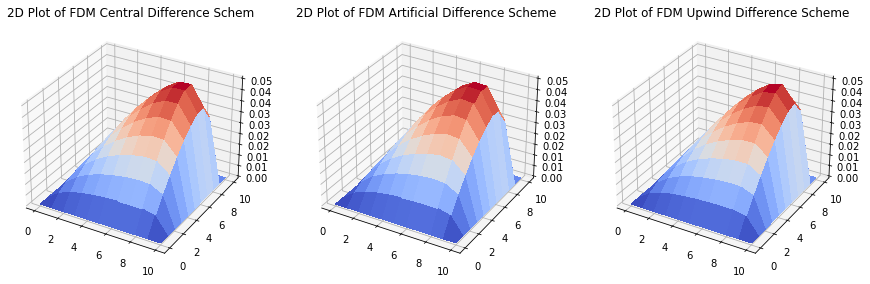

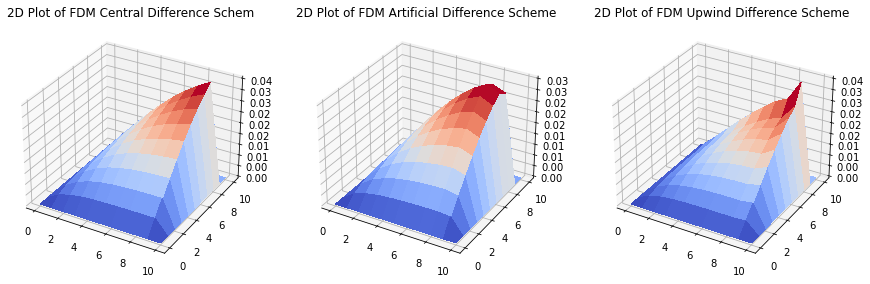

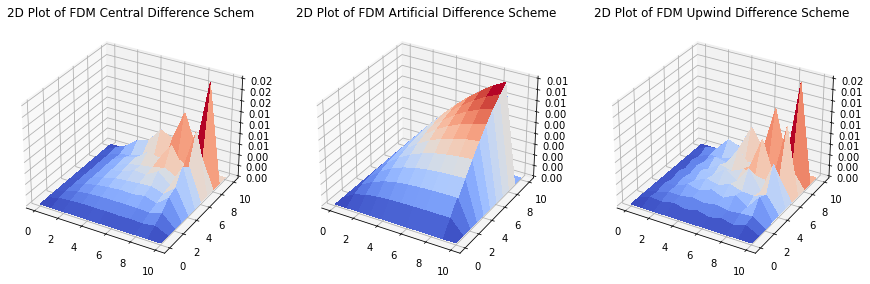

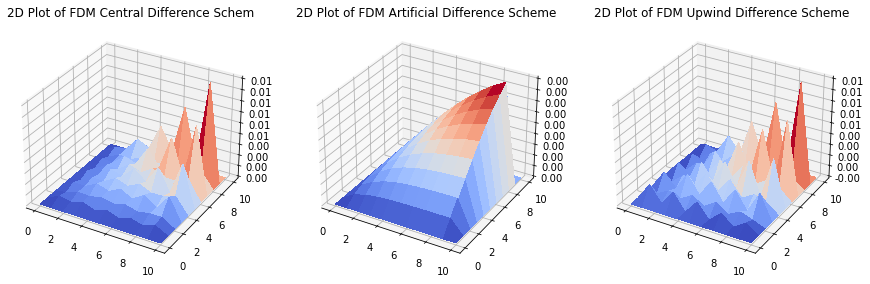

In [10]:
def Errors_3D_comparison(a):
    
    # Calculation
    FDM_cen = FDM_2D_Central(a, mu, s, u0, uN, N, M)
    FDM_art = FDM_2D_Artificial(a, mu, s, u0, uN, N, M)
    FDM_upw = FDM_2D_Upwinding(a, mu, s, u0, uN, N, M)

    FDM_cen_data = FDM_cen.reshape((N + 1, M + 1))
    FDM_art_data = FDM_art.reshape((N + 1, M + 1))
    FDM_upw_data = FDM_upw.reshape((N + 1, M + 1))
    
    # Plot 
    fig, axs = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15, 15))
    x = range(N + 1)
    y = range(M + 1)
    X, Y = np.meshgrid(x, y)
    
    surf = axs[0].plot_surface(X, Y, FDM_cen_data, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)
    surf = axs[1].plot_surface(X, Y, FDM_art_data, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)
    surf = axs[2].plot_surface(X, Y, FDM_upw_data, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)

    axs[0].zaxis.set_major_locator(LinearLocator(10))
    axs[0].zaxis.set_major_formatter('{x:.02f}')
    axs[1].zaxis.set_major_locator(LinearLocator(10))
    axs[1].zaxis.set_major_formatter('{x:.02f}')
    axs[2].zaxis.set_major_locator(LinearLocator(10))
    axs[2].zaxis.set_major_formatter('{x:.02f}')
    axs[0].set_title('2D Plot of FDM Central Difference Schem')
    axs[1].set_title('2D Plot of FDM Artificial Difference Scheme')
    axs[2].set_title('2D Plot of FDM Upwind Difference Scheme')

    plt.show()
    
N = 10
M = 10
dx = 1 / N
dy = 1 / M
xmesh = list(i * dx for i in range(N + 1))
ymesh = list(i * dy for i in range(M + 1))
s = 1
mu = 1
u0 = 0
uN = 0
Pe_choice = [0.25, 0.5, 1, 5, 10]
for Pe in Pe_choice:
    a = Pe * 2 * N * mu
    Errors_3D_comparison(a)